## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
mouse_data_df.head()
mouse_data_df.shape

(1893, 8)

In [4]:
# Checking the number of mice.
num_mice = mouse_data_df["Mouse ID"].nunique()
num_mice

249

In [5]:
mouse_data_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID.
# This shows me that mouse "g989" should be removed
dup_mouse_data = mouse_data_df[mouse_data_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Amount of rows in the DataFrame should have decreased
cleaned_mouse_data = mouse_data_df[mouse_data_df["Mouse ID"] != "g989"]
cleaned_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame
# Should be 248
number_mice = cleaned_mouse_data["Mouse ID"].nunique()
number_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# First calculate each of the statistics and store them to variables
tumor_mean = cleaned_mouse_data["Tumor Volume (mm3)"].mean()
tumor_median = cleaned_mouse_data["Tumor Volume (mm3)"].median()
tumor_variance = cleaned_mouse_data["Tumor Volume (mm3)"].var()
tumor_std = cleaned_mouse_data["Tumor Volume (mm3)"].std()
tumor_sem = cleaned_mouse_data["Tumor Volume (mm3)"].sem()

In [10]:
# Generate the summary statistics table with the values that were just created
summary_stats_table = pd.DataFrame({"Mean of Tumor Volume": [tumor_mean],
                                    "Median of Tumor Volume": tumor_median,
                                    "Variance of Tumor Volume": tumor_variance,
                                    "Standard Deviation of Tumor Volume": tumor_std,
                                    "SEM of Tumor Volume": tumor_sem
                                   })

# Cleaning up the formatting for the Purchasing Analysis summary table

# Add in proper notation
summary_stats_table = summary_stats_table.style.format({    "Mean of Tumor Volume": "{:,.2f}",
                                                            "Median of Tumor Volume": "{:,.2f}",
                                                            "Variance of Tumor Volume": "{:,.2f}",
                                                            "Standard Deviation of Tumor Volume": "{:,.2f}",
                                                            "SEM of Tumor Volume": "{:,.2f}"
                                                       })
summary_stats_table

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
0,50.44,48.93,79.46,8.91,0.21


In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_groups = cleaned_mouse_data.groupby("Drug Regimen")
drug_groups

In [12]:
# Calculate the summary values using the group just created
grouped_tumor_mean = drug_groups["Tumor Volume (mm3)"].mean()
grouped_tumor_median = drug_groups["Tumor Volume (mm3)"].median()
grouped_tumor_variance = drug_groups["Tumor Volume (mm3)"].var()
grouped_tumor_std = drug_groups["Tumor Volume (mm3)"].std()
grouped_tumor_sem = drug_groups["Tumor Volume (mm3)"].sem()

In [13]:
# Assemble the resulting series into a single summary dataframe.

# COME BACK TO THIS LATER
# MAYBE ASK IN OFFICE HOURS



In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_summary_table = pd.DataFrame({ "Mean of Tumor Volume": grouped_tumor_mean,
                                    "Median of Tumor Volume": grouped_tumor_median,
                                    "Variance of Tumor Volume": grouped_tumor_variance,
                                    "Standard Deviation of Tumor Volume": grouped_tumor_std,
                                    "SEM of Tumor Volume": grouped_tumor_sem
                                  })

# Add in proper notation
drug_summary_table = drug_summary_table.style.format({  "Mean of Tumor Volume": "{:,.2f}",
                                                        "Median of Tumor Volume": "{:,.2f}",
                                                        "Variance of Tumor Volume": "{:,.2f}",
                                                        "Standard Deviation of Tumor Volume": "{:,.2f}",
                                                        "SEM of Tumor Volume": "{:,.2f}"
                                                     })
drug_summary_table

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [15]:
# Using the aggregation method, produce the same summary statistics in a single line


# COME BACK TO THIS LATER
# MAYBE ASK IN OFFICE HOURS



## Bar and Pie Charts

In [16]:
# Get the names of all of the different drug regimens to be used in the x axis
drug_regimens = cleaned_mouse_data["Drug Regimen"].unique()
drug_regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

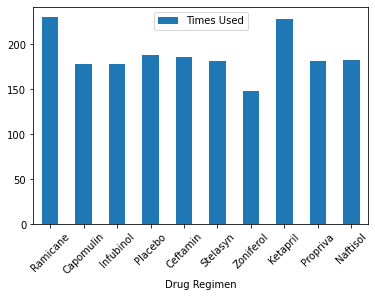

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_counts = drug_groups["Mouse ID"].count()
drug_counts

# Give the data frames the values and proper labels using the pandas functionality
pandas_regimen_data = pd.DataFrame({"Drug Regimen": drug_regimens, "Times Used": drug_counts})
 

# Create the chart using the pandas functionality
pandas_regimen_barchart = pandas_regimen_data.plot.bar(x= "Drug Regimen", y= "Times Used", rot=45)
pandas_regimen_barchart

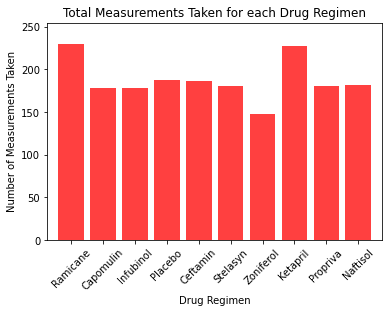

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(0, len(drug_regimens))

tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Total Measurements Taken for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")

plt.xlim(-0.75, len(drug_regimens)-.25)
plt.ylim(0, max(drug_counts) + 25)

plt.bar(x_axis, drug_counts, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, drug_regimens, rotation = 45)


# Best practice to always include plt.show, even though it is not technically needed in jupyter notebooks
plt.show()

# Make sure layout is clean and compact
plt.tight_layout()

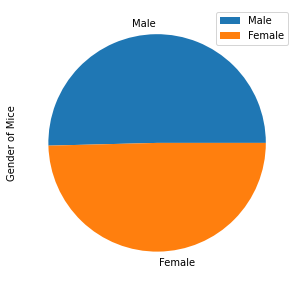

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a groupby to seperate the male and female mice
gender_groups = cleaned_mouse_data.groupby("Sex")
gender_groups

# Determine the values for the pie chart
genders = cleaned_mouse_data["Sex"].unique()
genders

# Added in the sort so that the 'male' value comes first
gender_count = gender_groups["Mouse ID"].nunique()
gender_count = gender_count.sort_values(ascending = False)


# Use pandas function to generate and plot the mouse gender count pie chart 



# UNSURE ABOUT "RADIus" VALUES>>??



gender_groups = pd.DataFrame({"Gender of Mice": gender_count,
                              "radius": [50, 51.8]},
                             index = genders
                             )

plot = gender_groups.plot.pie(y= "Gender of Mice", figsize=(5, 5))
plot

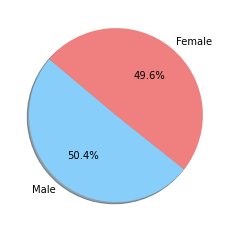

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = genders

# The values of each section of the pie chart
sizes = gender_count

# The colors of each section of the pie chart
colors = ["lightskyblue", "lightcoral"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow = True, startangle = 140)

plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
select_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
# Use a groupby to look at each unique mouse ID
mouse_group = cleaned_mouse_data.groupby("Mouse ID")
mouse_group

# Find the max value for each mouse in the Timepoint column and store that value
max_time = pd.DataFrame(mouse_group["Timepoint"].max())
max_time
# Rename the column
max_time = max_time.rename(columns = {"Timepoint": "Max Timepoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Storing this value in the new column called "Max Timepoint"
max_mouse_data = pd.merge(cleaned_mouse_data, max_time, on = "Mouse ID")
max_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
# Did this in the previous cell, it is the value below
select_drugs
#print(select_drugs)

# Create empty list to fill with tumor vol data (for plotting)
select_drugs_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in select_drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    select_drugs_df = max_mouse_data.loc[max_mouse_data["Drug Regimen"] == drug]
    select_drugs_df
    
    # add subset
    # Dataframe that will only look at the max timepoints, set them equal to the Timepoint column
    select_drugs_max_df = select_drugs_df.loc[select_drugs_df["Timepoint"] == select_drugs_df["Max Timepoint"]]
    
    # Append the select_drugs_data list with the max values tumor volume
    tumor_vol_at_max = select_drugs_max_df["Tumor Volume (mm3)"]
    select_drugs_data.append(tumor_vol_at_max)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_at_max.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {drug}: {iqr}")
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower bound for {drug}: {lower_bound}")
    print(f"Upper bound for {drug}: {upper_bound}")
    
    
    # Check for outliers by seeing if there are any values that fall outside of the upper and lower bounds
    # Using the "|" straight line symbol as it allows me to check to conditions (upper and lower)
    potential_outliers = (tumor_vol_at_max.loc[(select_drugs_df["Tumor Volume (mm3)"] >= upper_bound) |
                                                (select_drugs_df["Tumor Volume (mm3)"] <= lower_bound)])
    # Get the count of outliers per drug
    outliers_count = potential_outliers.count()
    print(f"Number of {drug} outliers: {outliers_count}")

IQR for Capomulin: 7.781863460000004
Lower bound for Capomulin: 20.70456164999999
Upper bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower bound for Ramicane: 17.912664470000003
Upper bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower bound for Infubinol: 36.83290494999999
Upper bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower bound for Ceftamin: 25.355449580000002
Upper bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


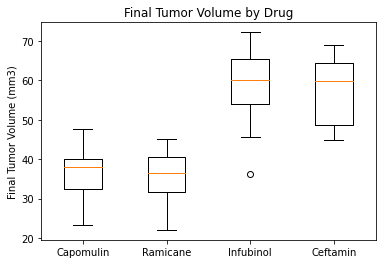

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Plot boxplot using plt function
plt.boxplot(select_drugs_data)

# Add title and labels to boxplot
plt.title("Final Tumor Volume by Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], select_drugs)

plt.show()

## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Find a mouse that was treated with Capomulin
cap_mouse = cleaned_mouse_data.loc[cleaned_mouse_data["Drug Regimen"] == "Capomulin"]
cap_mouse.head()

# Mouse (s185) was the first result so updated the df to only include mouse s185
cap_mouse = cap_mouse.loc[cap_mouse["Mouse ID"] == "s185"]
cap_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


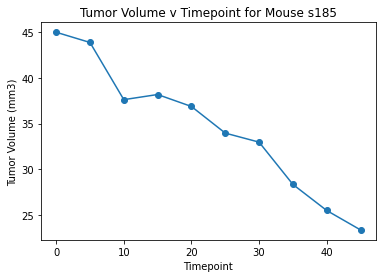

In [25]:
# Generate line plot of tumor volume v time point for mouse s185
# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis

# Use plt function to create the line plot
# Adding in circle on each data point to make the chart easier to read
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume v Timepoint for Mouse s185")

# Display plot
plt.show()

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create a dataframe that only looks at the Capomulin drug in the "Drug Regimen" column
capomulin_df = cleaned_mouse_data.loc[cleaned_mouse_data["Drug Regimen"] == "Capomulin"]
capomulin_df

# Use groupby to look at the unique mice IDs that took capomulin
capomulin_mice = capomulin_df.groupby('Mouse ID')
capomulin_mice

# Find average tumor volume for each mouse
avg_tumor = pd.DataFrame(mouse_group["Tumor Volume (mm3)"].mean())
avg_tumor

# Rename the column
avg_tumor = avg_tumor.rename(columns = {"Tumor Volume (mm3)": "Average Tumor"})

# Merge average tumor volume onto data_df and drop duplicates
capomulin_mice = pd.merge(capomulin_df, avg_tumor, on = "Mouse ID")
capomulin_mice

# Drop and duplicated values
cleaned_capomulin_mice = capomulin_mice[["Weight (g)", "Average Tumor"]].drop_duplicates()
cleaned_capomulin_mice

,Weight (g),Average Tumor
0,17,34.559143
10,15,36.182040
20,17,34.847470
30,17,36.505973
35,17,39.887495
45,17,38.506829
55,17,36.509212
65,19,39.049816
75,17,39.328725
85,20,39.141053


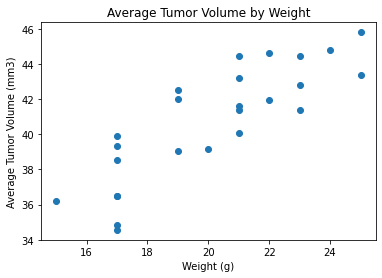

In [27]:
# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(cleaned_capomulin_mice["Weight (g)"], cleaned_capomulin_mice["Average Tumor"])

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# Display plot
plt.show()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Set x and y values for easier readability in the code
x_values = cleaned_capomulin_mice["Weight (g)"]
y_values = cleaned_capomulin_mice["Average Tumor"]

# Get the regression values using the scipi stats function
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Set line equation value (y = mx + b)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


y = 0.95x + 21.55
